In [31]:
from models import MeshModel
import jax
from jax.typing import ArrayLike
from models.spots import v_spot
from models import MeshModel, IcosphereModel
import jax.numpy as jnp
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation
from plots import plot_3D, plot_2D
from spectrum import simulate_spectrum, blackbody_intensity
from functools import partial
from models.spots import add_spots

m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([jnp.log10(7000)]), jnp.ones(19)]))  #__overabundance_spot_params(theta, phi, abun, abun_bg, radius, radius_factor, coord)

In [32]:
s = add_spots(m, jnp.array([0., 1.]),
              jnp.array([0., .5]), jnp.array([0.1, 0.5]),
              jnp.array([1., 0.5]), jnp.array([1., 0.9]), jnp.array([0, 0]))

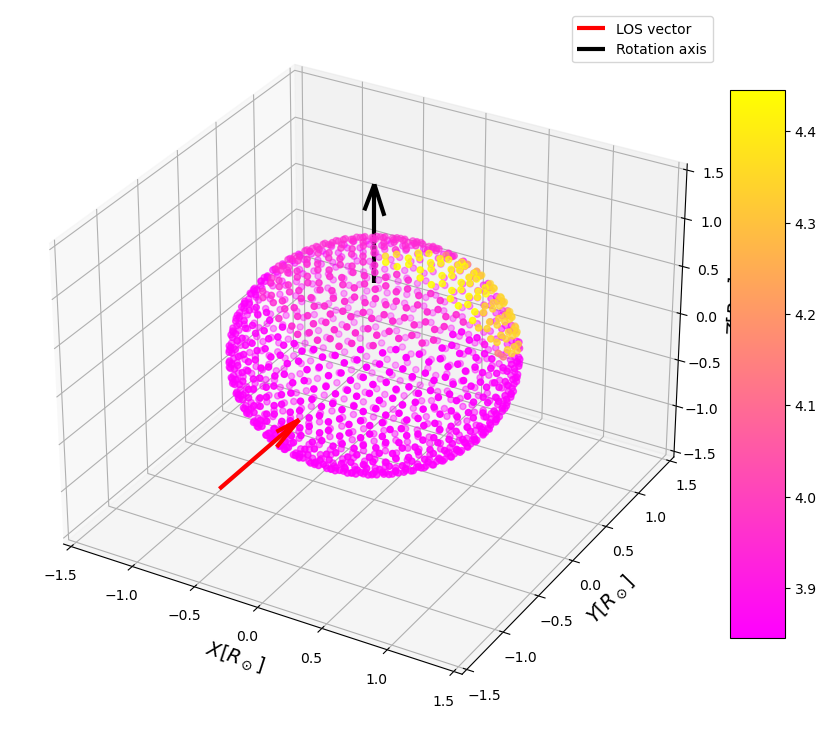

In [33]:
plot_3D(s, 0, cmap='spring')

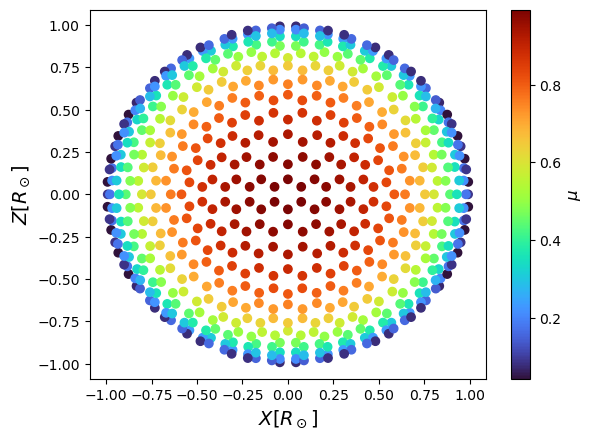

In [34]:
plot_2D(s, 'mus', x_index=0, y_index=2)

In [35]:
s._replace

<bound method MeshModel._replace of IcosphereModel(radius=Array(1., dtype=float32, weak_type=True), mass=Array(1., dtype=float32, weak_type=True), abs_luminosity=Array(1., dtype=float32, weak_type=True), vertices=Array([[-0.5257311,  0.8506508,  0.       ],
       [ 0.5257311,  0.8506508,  0.       ],
       [-0.5257311, -0.8506508,  0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ]], dtype=float32), faces=Array([[  0., 162., 164.],
       [ 42., 163., 162.],
       [ 44., 164., 163.],
       ...,
       [161., 641., 640.],
       [159., 639., 641.],
       [640., 641., 639.]], dtype=float32), centers=Array([[-0.5419383 ,  0.833141  ,  0.07076223],
       [-0.6268914 ,  0.7595129 ,  0.15157709],
       [-0.49652728,  0.84008235,  0.20137173],
       ...,
       [ 0.89220524,  0.44164842,  0.        ],
       [ 0.9426334 ,  0.3096258 ,  0.08159448],
       [ 0.9299421 ,  0.3552062

In [36]:
import astropy.units as u
import numpy as np

In [22]:
bi = blackbody_intensity(jnp.log10(jnp.linspace(1000., 15000., 100)), 0., [np.log10(7000)])

In [23]:
jnp.max(jnp.where(s.mus>0, s.mus, 0.))

Array(0.9927091, dtype=float32)

In [37]:
m = m._replace(mus = jnp.where(m.mus>0, m.mus, 0.))

In [38]:
1.2*1e14*(u.erg*np.power(u.cm, -2)/u.s/u.angstrom).to(u.kW*np.power(u.m, -2)/u.nm)

1200000000.0

In [40]:
jnp.min(m.mus)

Array(0., dtype=float32)

In [42]:
i = simulate_spectrum(blackbody_intensity, m, jnp.log10(jnp.linspace(1000., 15000., 100)))

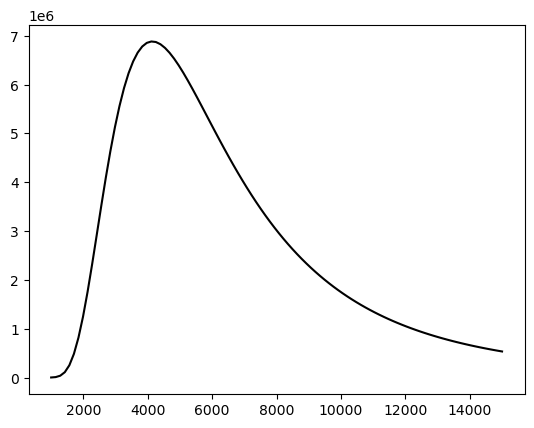

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Wavelength [$\\AA$]')

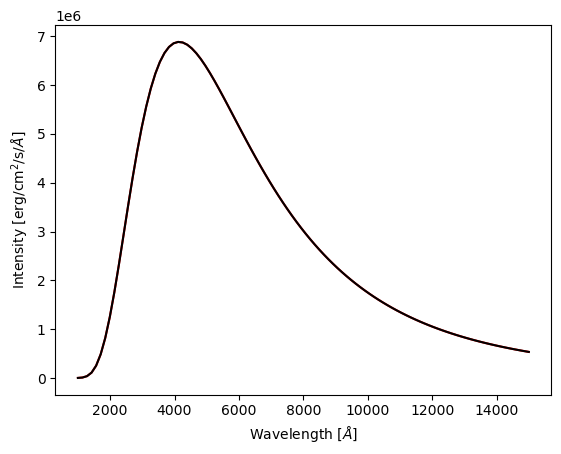

In [45]:

plt.plot(jnp.linspace(1000., 15000., 100), bi[0], color='red');
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black');
plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')